In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def identify_consolidation_and_breakout(data, window=10, threshold=0.02):
    """
    Identify consolidation zones and breakout points in stock prices.

    :param data: DataFrame containing stock price data with 'Date' and 'Close' columns.
    :param window: Number of periods for rolling window to identify consolidation.
    :param threshold: Maximum percentage range within the consolidation period.
    :return: DataFrame with consolidation and breakout points marked.
    """
    data['Rolling Max'] = data['Close'].rolling(window).max()
    data['Rolling Min'] = data['Close'].rolling(window).min()
    data['Range'] = (data['Rolling Max'] - data['Rolling Min']) / data['Rolling Min']

    # Identify consolidation periods
    data['Consolidation'] = data['Range'] < threshold

    # Identify breakout points (price moves beyond the consolidation range)
    data['Breakout Up'] = (data['Close'] > data['Rolling Max'].shift(1)) & data['Consolidation'].shift(1)
    data['Breakout Down'] = (data['Close'] < data['Rolling Min'].shift(1)) & data['Consolidation'].shift(1)

    return data


In [20]:
print(Path.cwd().parent)
path_data = Path.cwd().parent / Path("data/stock_data.csv")
print(path_data)
# Load stock data
# Ensure the CSV contains 'Date' and 'Close' columns
data = pd.read_csv(path_data)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



/Users/daniel/Idan/Investments/moving_average/stock_strategy_tester
/Users/daniel/Idan/Investments/moving_average/stock_strategy_tester/data/stock_data.csv


In [21]:
# Identify consolidation and breakout
window = 10  # 10-day window for consolidation
threshold = 0.02  # 2% range for consolidation
result = identify_consolidation_and_breakout(data, window, threshold)


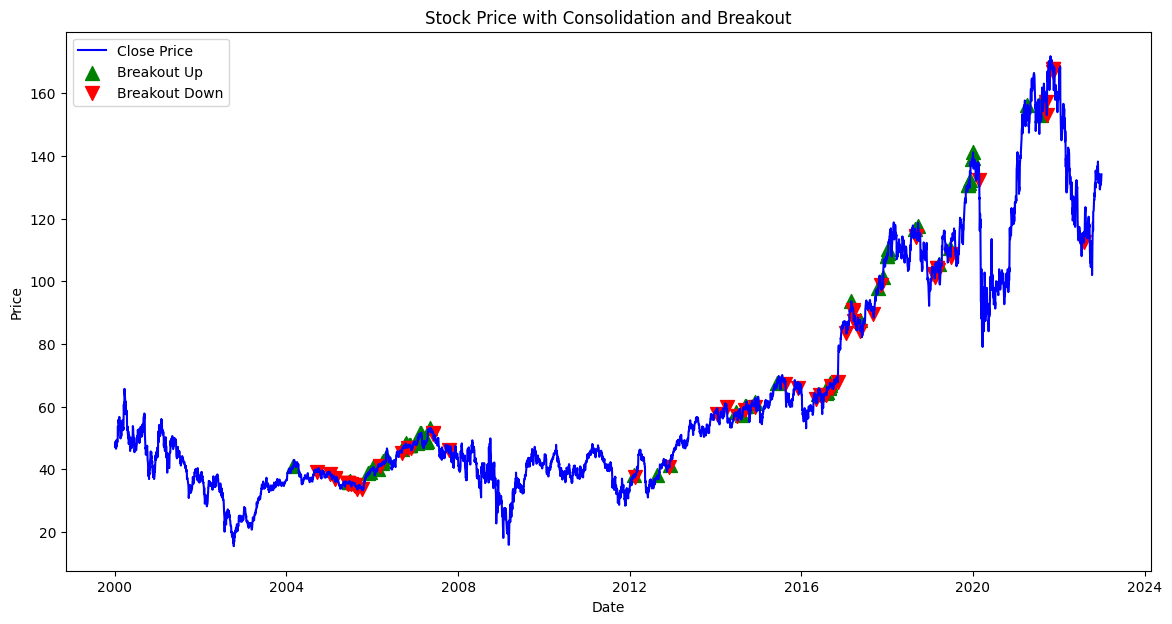

In [22]:

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label="Close Price", color='blue')
plt.scatter(data.index[result['Breakout Up']], data['Close'][result['Breakout Up']], color='green', label='Breakout Up', marker='^', s=100)
plt.scatter(data.index[result['Breakout Down']], data['Close'][result['Breakout Down']], color='red', label='Breakout Down', marker='v', s=100)
plt.title("Stock Price with Consolidation and Breakout")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()